In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set the matplotlib output to svg
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import os
# check for set environment variable JB_NOSHOW
show = True
if 'JB_NOSHOW' in os.environ:
    show = False

# Fundamentals

Thermodynamics describes the macroscopic changes of a system of microscopic objects, i.e. particles. It is a statistical description for the e.g. sets of atoms or molecules in solids, liquids and gases. As an individual (quantuum-) mechanical description for large particle counts is not possible or even needed, thermodynamics reduces the description to a few (measurable) quantities in a defined system.

## Systems

In a thermodynamic analysis it is essential to define the investigated system and its interaction with the ambient environment. A system is a volume containing a (fixed) number of particles.

The interaction of systems can be described with the following three process quantities:

* **work**, $\mf W$, e.g. mechanical or electrical work, like the compression of a volume due to a moving pistion, 
* **heat**, $\mf Q$, e.g. energy transfer due to a temperature difference, and
* **mass flow**, e.g. addition of mass into a system.

There are four definitions of system boundaries / interactions of systems (including the ambient environment):

* **isolated**: no mass flow, no heat flow ($\mf \Delta Q=0$) and no work done ($\mf \Delta W=0$),
* **closed**: no mass flow, possibility for heat flow ($\mf \Delta Q\neq 0$) and / or work to be done ($\mf \Delta W\neq 0$)
* **adiabatic**: no mass and no heat flow ($\mf \Delta Q=0$), yet work can to be done ($\mf \Delta W\neq 0$), and
* **open**: possibility for mass and heat flow, as well as for work to be done.

## State Quantities

The state of a thermodynamic system can be expressed with these measurable quantities like

* **pressure**, $\mf p$,
* **volume**, $\mf V$, and
* **temperature**, $\mf T$,

and the deduced quantites like

* **inner energy**, $\mf U$,
* **enthalpy**, $\mf H$, and
* **entropy**, $\mf S$.

These quantities describe a system directly with their values. I.e. if a system changes from one state to another, then the way it changes does not matter, just the state quantities values at the new state define it.

In contrast to that, the process quantites (heat and work) do depend on the way the system changes.

Some of the quantities depend on the system size, e.g. the system's mass, and are called extensive quantities. Examples are the inner energy or enthalpy.

Intensive quantities, like pressure or temperature, do not depend on the system's size.

In order to transform extensive quantities to intensive quantites, (mass) specific values can be used. This way, any extensive quantity $\mf A$ of a system with the mass $\mf M$ is expressed as $\mf a$ being an intensive quantity:

$$
\sf a = \frac{A}{M}\quad .
$$

## Temperature

[Thermodynamic temperature](https://en.wikipedia.org/wiki/Thermodynamic_temperature) is an expression to characterise the random (thermal) motion of the particles. In general all interacting thermodynamic systems try to equal their temperatures by an energy flow, i.e. heat. This means, that if two systems with different temperatures are brought togehter, the induced heat flow will reduce the temperature of the warmer system and increase the temperature of the colder system. The heat flux is always from the higher to the lower temperature.

In a thermodynamic equilibrium, there are no heat or mass flows between interacting systems, i.e. the state quatities do not change in time. This leads to a thermal equilibrium, where the systems have the same temperature. A single system is in thermal equilibrium if the temperature is homogenous and does not change with time. 

The SI-unit of temperature is Kelvin, where $\mf 0~K$ is the absolute lowest temperature and $\mf 0~^\circ C$ corresponds to $\mf 273.15~K$. Temperature differences have the same values in Kelvin as in Celsius. 

At finite temperatre, the particles in a gas have not a single velocity, but a distributed over a broad range. This is an important aspect, as many chemical reactions require the involved particles to overcome the activation energy. Thus, there is always a probability that a particle has the needed kinetic energy. This velocitiy distribution, the Maxwell distribution, depends only on the temperature and the gas properties:

$$
\mf f(v) = 4\pi v^2 \left(\frac{m_M}{2\pi k_B T}\right)^{\frac{3}{2}} \cdot e^{\left(-\frac{m_M v^2}{2 k_B T}\right)}\quad ,
$$

with $\mf m_M$ the mass of a single particle and the Boltzmann constant $\mf k_B \approx 1.38\cdot 10^{-23}~ J/K$. 

The most probable velocity $\mf v_p$ is given by

$$
\mf v_p = \sqrt{\frac{2k_B T}{m_m}},
$$

the mean velocity $\mf \bar{v}$ is

$$
\mf \bar{v} = \sqrt{\frac{8k_B T}{\pi m_m}},
$$

and the velocity with the median kinetic energy $\mf v_m$ can be computed as

$$
\mf v_m = \sqrt{\frac{3k_B T}{m_m}}\quad .
$$

The integration of the velocity distribution leads to the probability for a particle to have a velocity in the integration range. The distribution function at two temperatures is shown in {numref}`fig-thermo-maxwell`.

In [31]:
v = np.linspace(0, 2000, 100)
T1 = 300
T2 = 1000
NA = 6e23
k = 1.38e-23
mm = 28e-3 / NA
fv1 = 4 * np.pi * v**2 * (mm / (2 * np.pi * k * T1))**(3/2) \
       * np.exp(-mm * v**2 / (2 * k * T1)) * 1e3

fv2 = 4 * np.pi * v**2 * (mm / (2 * np.pi * k * T2))**(3/2) \
       * np.exp(-mm * v**2 / (2 * k * T2)) * 1e3


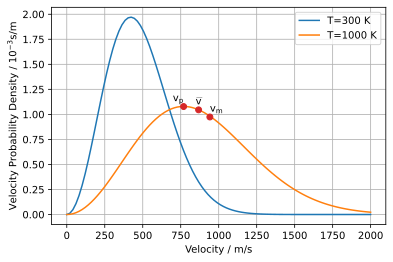

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(v, fv1, label='T=300 K')
plt.plot(v, fv2, label='T=1000 K')
plt.xlabel('Velocity / m/s')
plt.ylabel('Velocity Probability Density / $\sf 10^{-3}$s/m')
plt.grid()
plt.legend()

vm = np.sqrt(3*k*T2 / mm)
vp = np.sqrt(2/3) * vm
vb = np.sqrt(8/(3*np.pi)) * vm

fvm = fv2[np.where(v > vm)[0][0]]
fvp = fv2[np.where(v > vp)[0][0]]
fvb = fv2[np.where(v > vb)[0][0]]

plt.scatter([vm, vp, vb], [fvm, fvp, fvb], color='C3', zorder=5)

df = 0.05 * fvp
plt.text(vm, fvm+df, r'$\sf v_m$', ha='left')
plt.text(vp, fvp+df, r'$\sf v_p$', ha='right')
plt.text(vb, fvb+df, r'$\sf \widebar{v}$', ha='center')

plt.savefig('./figs/maxwell.svg');
if show: plt.show();
plt.clf();

:::{figure-md} fig-thermo-maxwell

<img src="./figs/maxwell.svg" width="80%" >

Maxwell's velocity probability density function. 
:::

## Ideal Gases

Ideal gases represent the assumption that the particles have a very small volume, i.e. can be treated as point particles, and the gas volume contains a large number of same particles. Additionally, there are no forces interacting between the particles – but the idealised (elastic, instant) collisions with each other and the system boudaries.

Equations of state relate various state quantities, as they are in general not independent. In the case of an ideal gas, the following equation of state – called (classical) ideal gas law – can be used:

$$
\mf pV = n R T
$$

where $\mf n$ respresents the number of moles in the system and $\mf R \approx 8.314~J/(mol~K)$ is the universal gas constant. A mole is defined by the [Avogadro constant](https://en.wikipedia.org/wiki/Avogadro_constant), as $\sf N_A \approx 6.02\cdot 10^{23}~1/mol$ being the number of particles in a mole.

## Heat Capacity

To (infinitesimally) increase the temperature of a system by $\mf dT$, the following amount of heat $\mf \Delta Q$ is needed

$$
\mf \Delta Q = C\cdot dT
$$

where $\mf C$ is the heat capacity. The correspondig (mass) specific quantity is $\mf c$. In general this material dependent quantity is temperature-dependent, $\mf C=C(T)$, thus the heat needed to change a system's from temperature $\mf T_1$ to $\mf T_2$ is

$$
\mf Q_{12} = \int_{T_1}^{T_2} C(T)\ dT
$$

The specific values depend on the process itself, thus the two following specification need to be considerd:

* **isochoric**, i.e. the volume stays constant during the process $\mf \Delta V=0$, $\mf c_V$, the heat flux does change only the internal energy, and
* **isobaric**, i.e. the pressure stays constant $\mf \Delta p=0$, $\mf c_p$, where the heat flux can change the internal energy and can do work.

Both values are related:

$$ 
\mf c_p - c_v = \frac{R}{M}
$$

where $\mf M$ is the molar mass and 

$$ 
\mf \frac{c_p}{c_v} = \gamma
$$

where $\mf \gamma$ is called the heat capacity ratio. 

For isobaric processes, the change of enthalpy for a given heat amount is given by

$$
\mf dH = \Delta Q \big|_{\text{at}\ dp=0} = m c_p dT\quad .
$$

## Laws of Thermodynamics

* [Zero-th law](https://en.wikipedia.org/wiki/Zeroth_law_of_thermodynamics)
* [First law](https://en.wikipedia.org/wiki/First_law_of_thermodynamics)
* [Second law](https://en.wikipedia.org/wiki/Second_law_of_thermodynamics)
* [Third law](https://en.wikipedia.org/wiki/Third_law_of_thermodynamics)